<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [10]:
!pip install pandas

In [11]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [12]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-01-11 15:00:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  47.6MB/s    in 3.2s    

2025-01-11 15:00:21 (47.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [14]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [15]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [16]:
import sqlite3
conn = sqlite3.connect('survey-data.sqlite')

### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



/tmp/ipykernel_245/3367752634.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


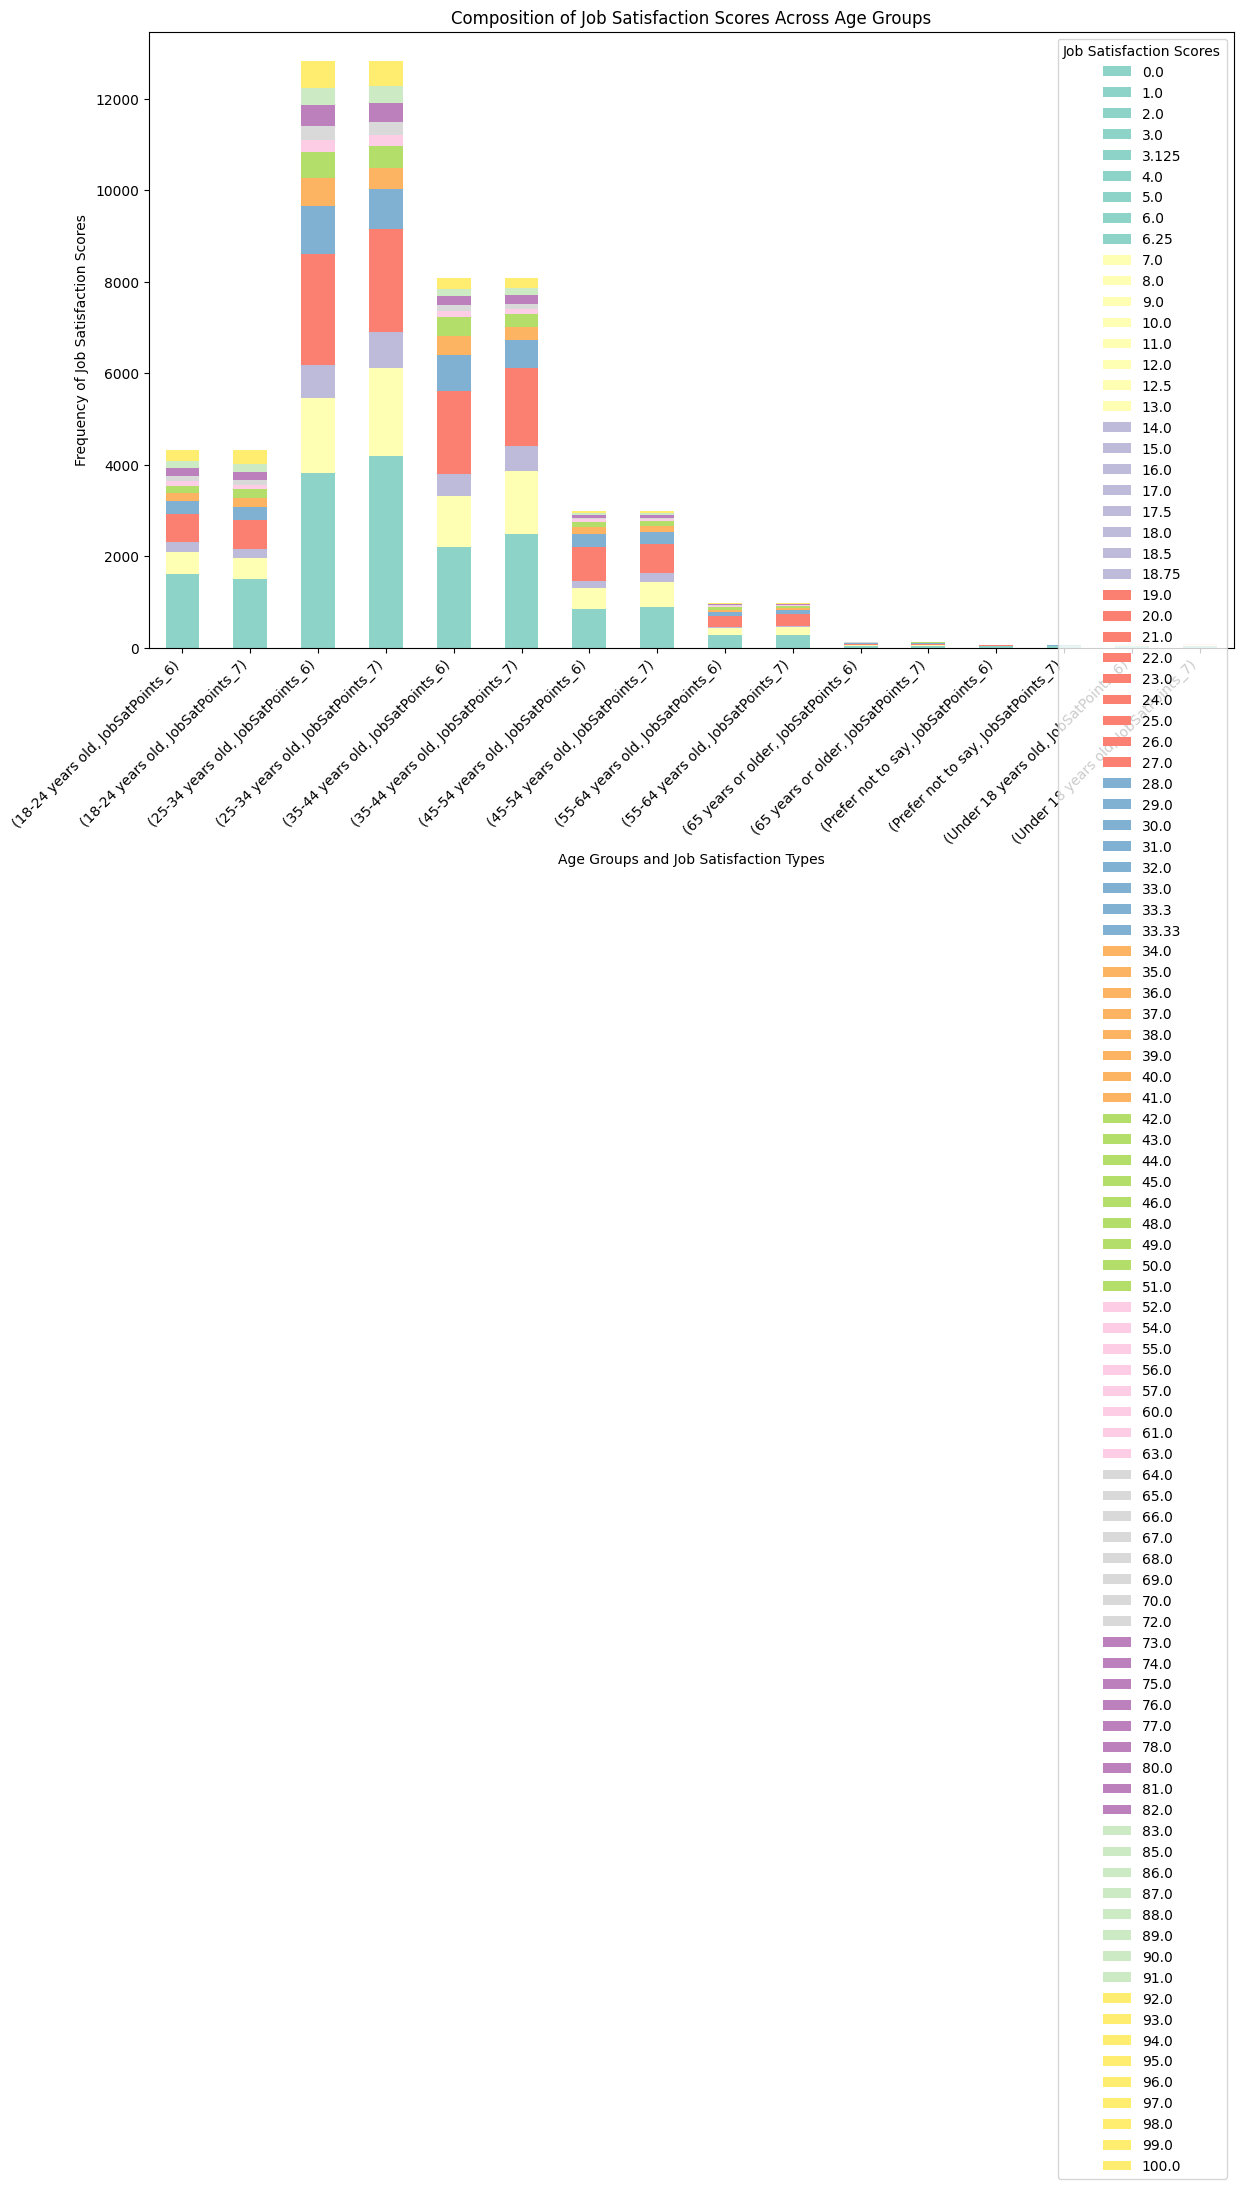

In [17]:
##Write your code here
# Query the data for JobSatPoints_6 and JobSatPoints_7 columns
query = """
SELECT Age, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND JobSatPoints_7 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Group data by Age and calculate the count for each job satisfaction score (JobSatPoints_6, JobSatPoints_7)
df_melted = df.melt(id_vars=['Age'], value_vars=['JobSatPoints_6', 'JobSatPoints_7'],
                    var_name='JobSatType', value_name='JobSatScore')

# Group by Age and JobSatScore and count the frequency of each combination
grouped = df_melted.groupby(['Age', 'JobSatType', 'JobSatScore']).size().reset_index(name='Frequency')

# Pivot the data for easier plotting
pivot_df = grouped.pivot_table(index=['Age', 'JobSatType'], columns='JobSatScore', values='Frequency', fill_value=0)

# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set3')

# Customize plot
plt.title('Composition of Job Satisfaction Scores Across Age Groups')
plt.xlabel('Age Groups and Job Satisfaction Types')
plt.ylabel('Frequency of Job Satisfaction Scores')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Job Satisfaction Scores', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_245/3056897584.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


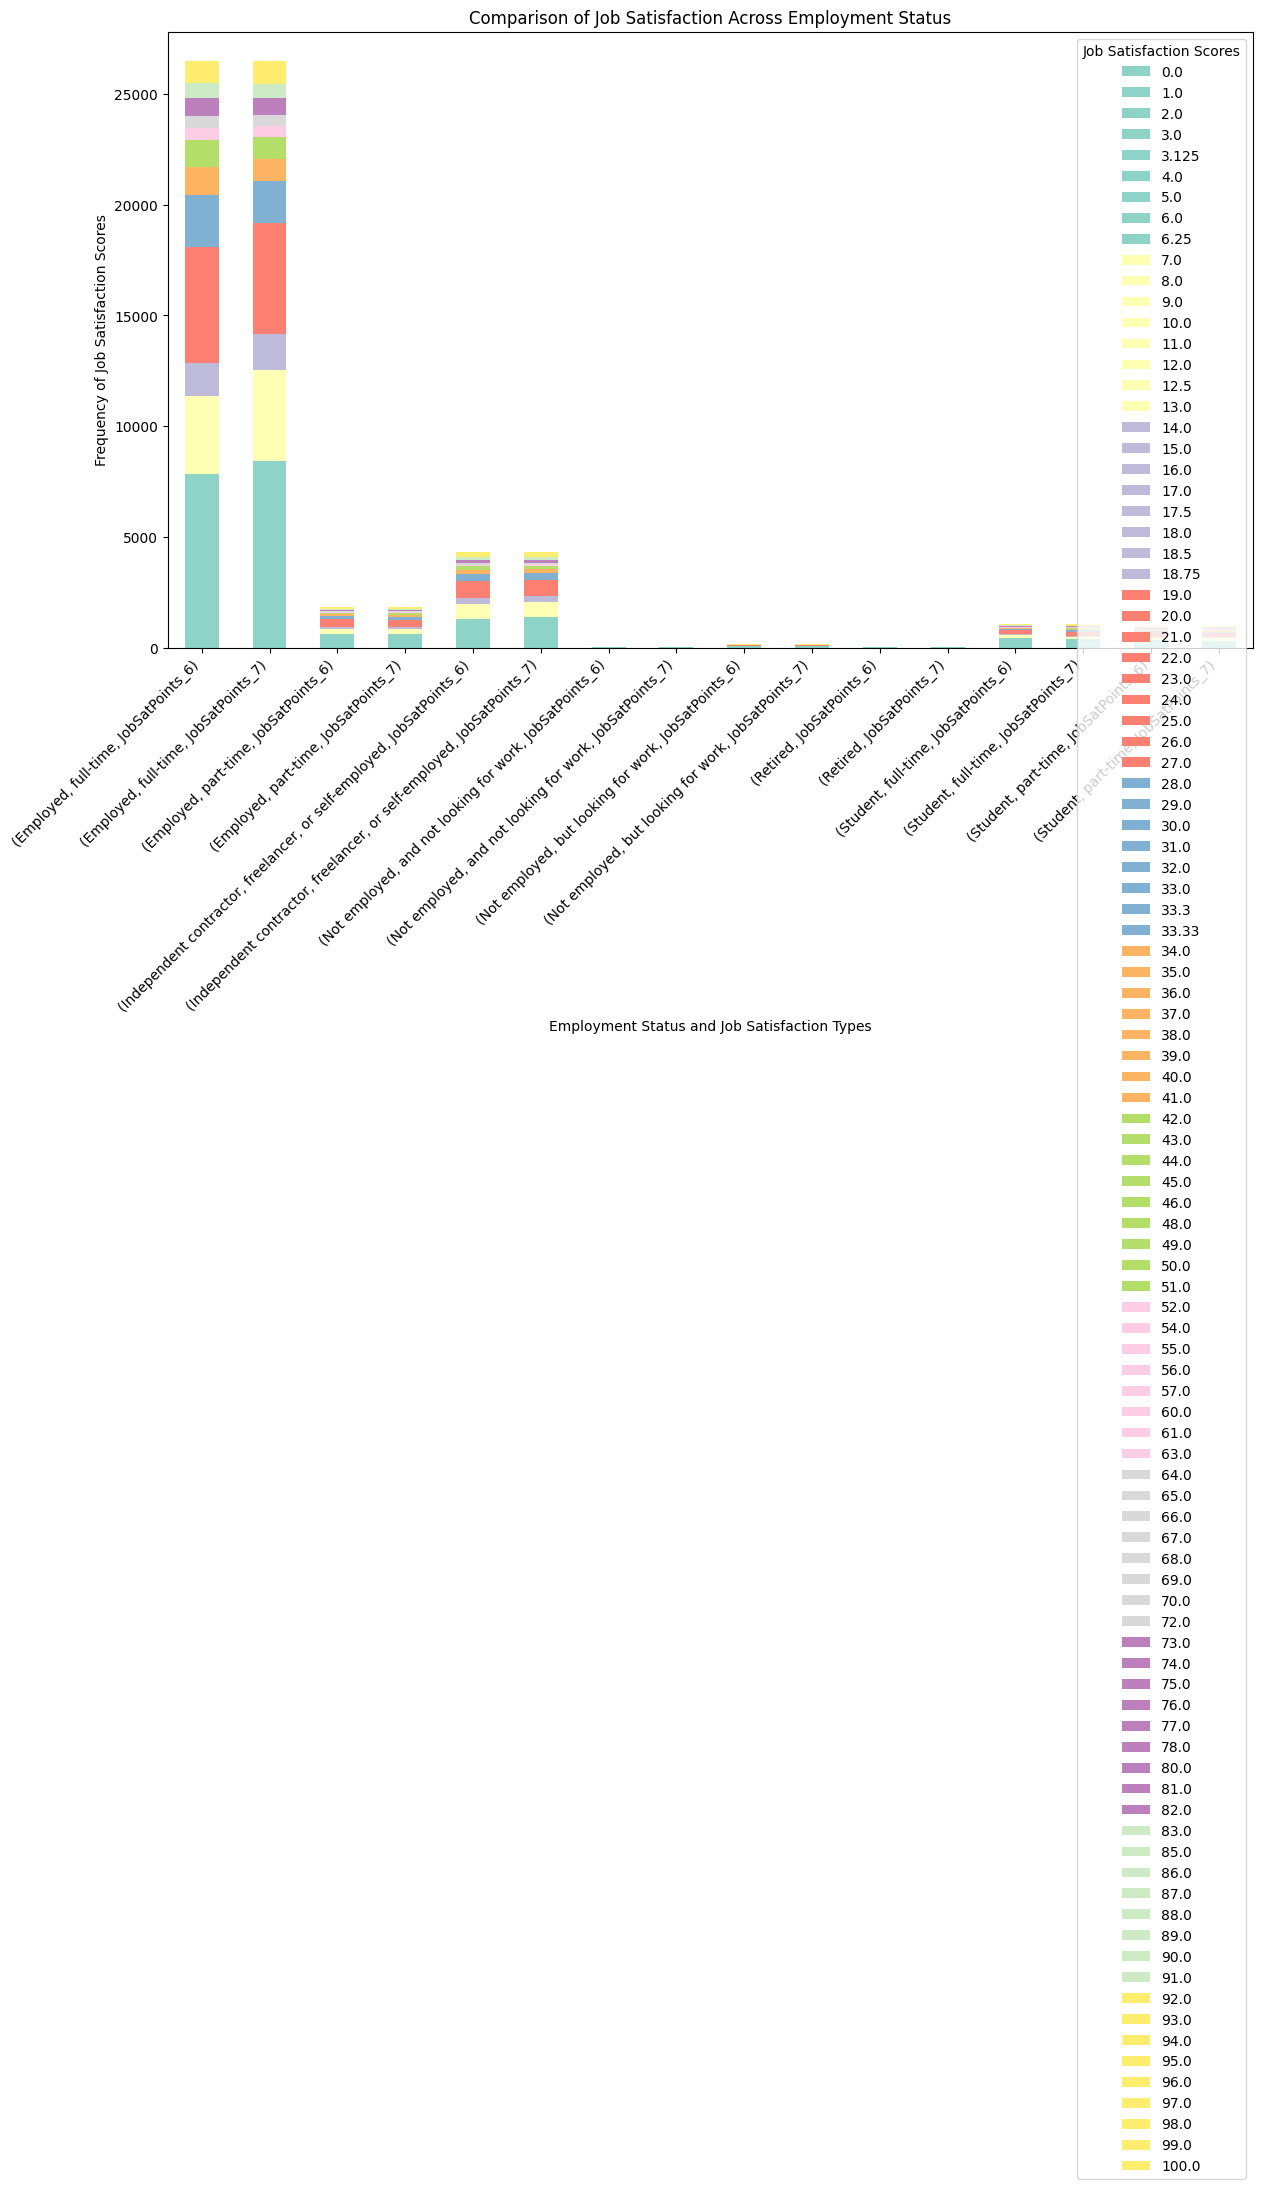

In [20]:
##Write your code here

# Query the data for Employment, JobSatPoints_6, and JobSatPoints_7 columns
query = """
SELECT Employment, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND JobSatPoints_7 IS NOT NULL AND Employment IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Split the 'Employment' column where semicolons appear and expand into separate rows
df_expanded = df.assign(Employment=df['Employment'].str.split(';')).explode('Employment')

# Melt the data for JobSatPoints_6 and JobSatPoints_7
df_melted = df_expanded.melt(id_vars=['Employment'], value_vars=['JobSatPoints_6', 'JobSatPoints_7'],
                             var_name='JobSatType', value_name='JobSatScore')

# Group by Employment, JobSatType, and JobSatScore to count the frequencies
grouped = df_melted.groupby(['Employment', 'JobSatType', 'JobSatScore']).size().reset_index(name='Frequency')

# Pivot the data to make it suitable for plotting
pivot_df = grouped.pivot_table(index=['Employment', 'JobSatType'], columns='JobSatScore', values='Frequency', fill_value=0)

# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set3')

# Customize the plot
plt.title('Comparison of Job Satisfaction Across Employment Status')
plt.xlabel('Employment Status and Job Satisfaction Types')
plt.ylabel('Frequency of Job Satisfaction Scores')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Job Satisfaction Scores', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


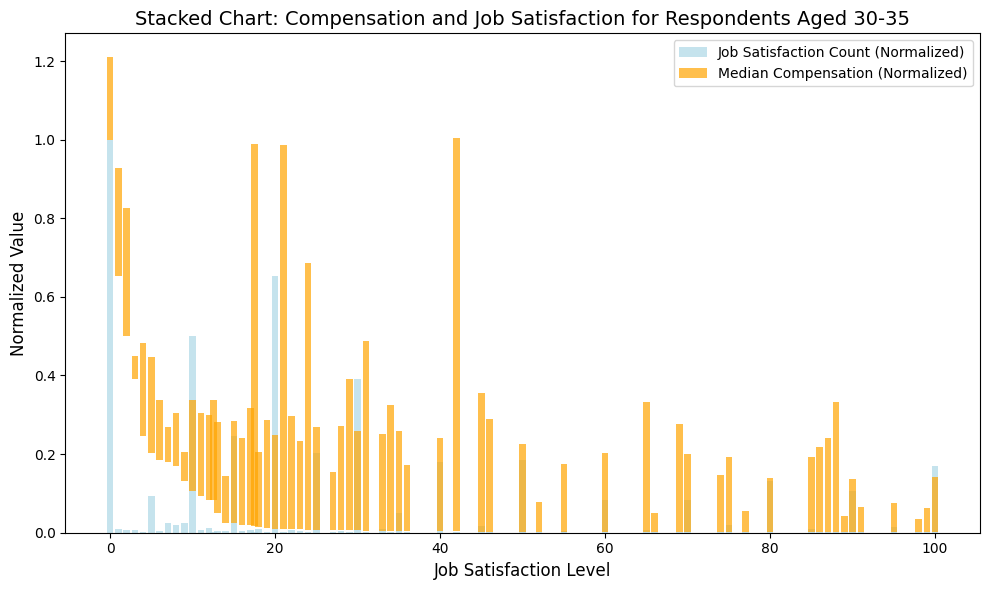

In [28]:
##Write your code here

# Query the data for respondents aged 30-35
query = """
SELECT ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age ='25-34 years old'
AND ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)


# Group the data by job satisfaction level
compensation_by_satisfaction = df.groupby('JobSatPoints_6')['ConvertedCompYearly'].median()

# Count the number of respondents in each satisfaction level
satisfaction_counts = df['JobSatPoints_6'].value_counts()

# Normalize the satisfaction counts for plotting
satisfaction_counts_normalized = satisfaction_counts / satisfaction_counts.max()

# Create a stacked bar chart for job satisfaction levels and median compensation
fig, ax = plt.subplots(figsize=(10, 6))

# Plot job satisfaction counts (normalized) as the first stack (light blue)
ax.bar(satisfaction_counts_normalized.index, satisfaction_counts_normalized, label='Job Satisfaction Count (Normalized)', color='lightblue', alpha=0.7)

# Plot median compensation as the second stack (orange)
ax.bar(compensation_by_satisfaction.index, compensation_by_satisfaction / compensation_by_satisfaction.max(), 
       label='Median Compensation (Normalized)', color='orange', alpha=0.7, bottom=satisfaction_counts_normalized)

# Adding labels and title
ax.set_xlabel('Job Satisfaction Level', fontsize=12)
ax.set_ylabel('Normalized Value', fontsize=12)
plt.title('Stacked Chart: Compensation and Job Satisfaction for Respondents Aged 30-35', fontsize=14)

# Add a legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_245/2333689421.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


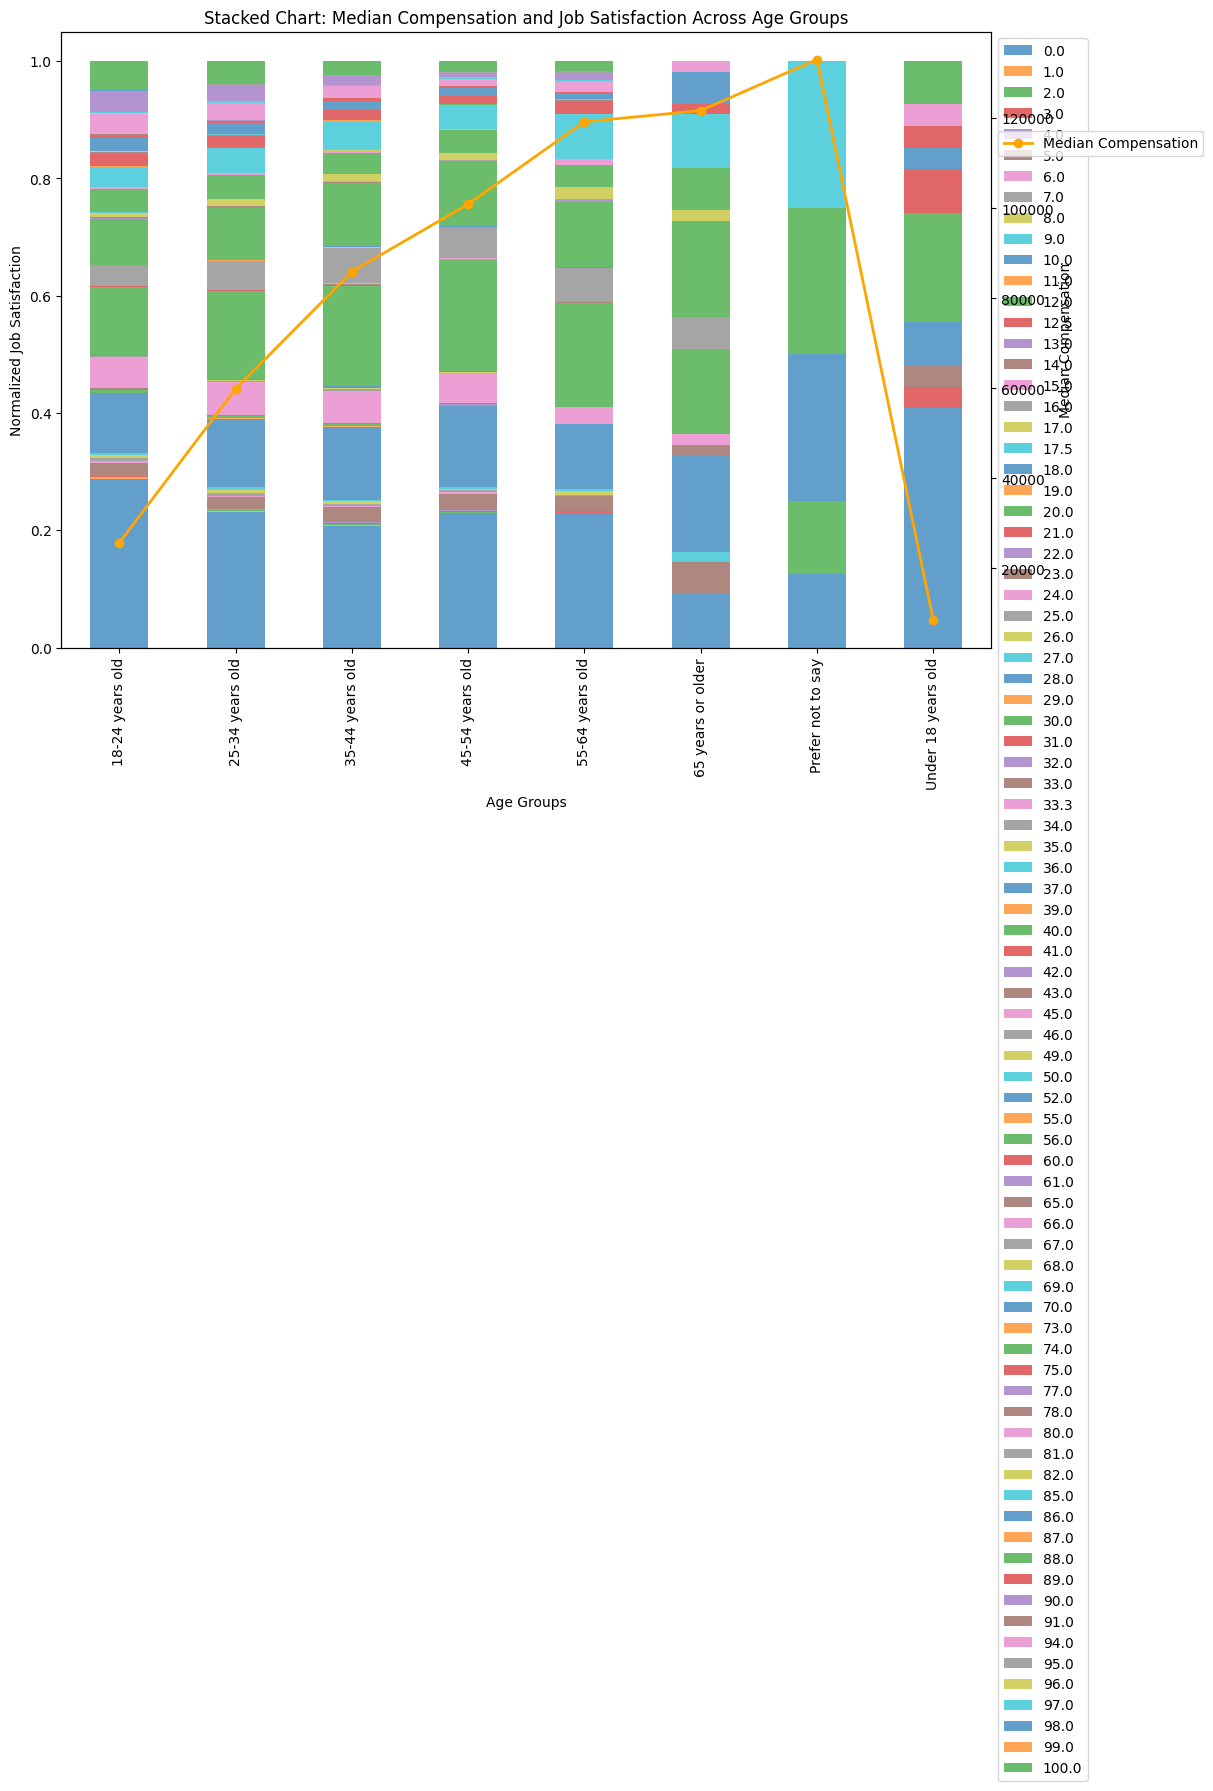

In [30]:
##Write your code here

# Query the data
query = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)


# Group by Age and calculate median compensation and job satisfaction distribution
median_compensation = df.groupby('Age')['ConvertedCompYearly'].median()

# Count the job satisfaction levels per age group
job_sat_distribution = df.groupby(['Age', 'JobSatPoints_6']).size().unstack(fill_value=0)

# Normalize the job satisfaction distribution for better comparison
job_sat_distribution_normalized = job_sat_distribution.div(job_sat_distribution.sum(axis=1), axis=0)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plot job satisfaction distribution as stacked bars
job_sat_distribution_normalized.plot(kind='bar', stacked=True, ax=ax, alpha=0.7)

# Plot median compensation on top of the stacked bars
ax2 = ax.twinx()  # Create a second y-axis for compensation
ax2.plot(median_compensation.index, median_compensation, label='Median Compensation', color='orange', marker='o', linewidth=2)

# Customize the chart
ax.set_xlabel('Age Groups')
ax.set_ylabel('Normalized Job Satisfaction')
ax2.set_ylabel('Median Compensation')
ax.set_title('Stacked Chart: Median Compensation and Job Satisfaction Across Age Groups')

# Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1, 0.85))

# Show the plot
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


<Figure size 1200x800 with 0 Axes>

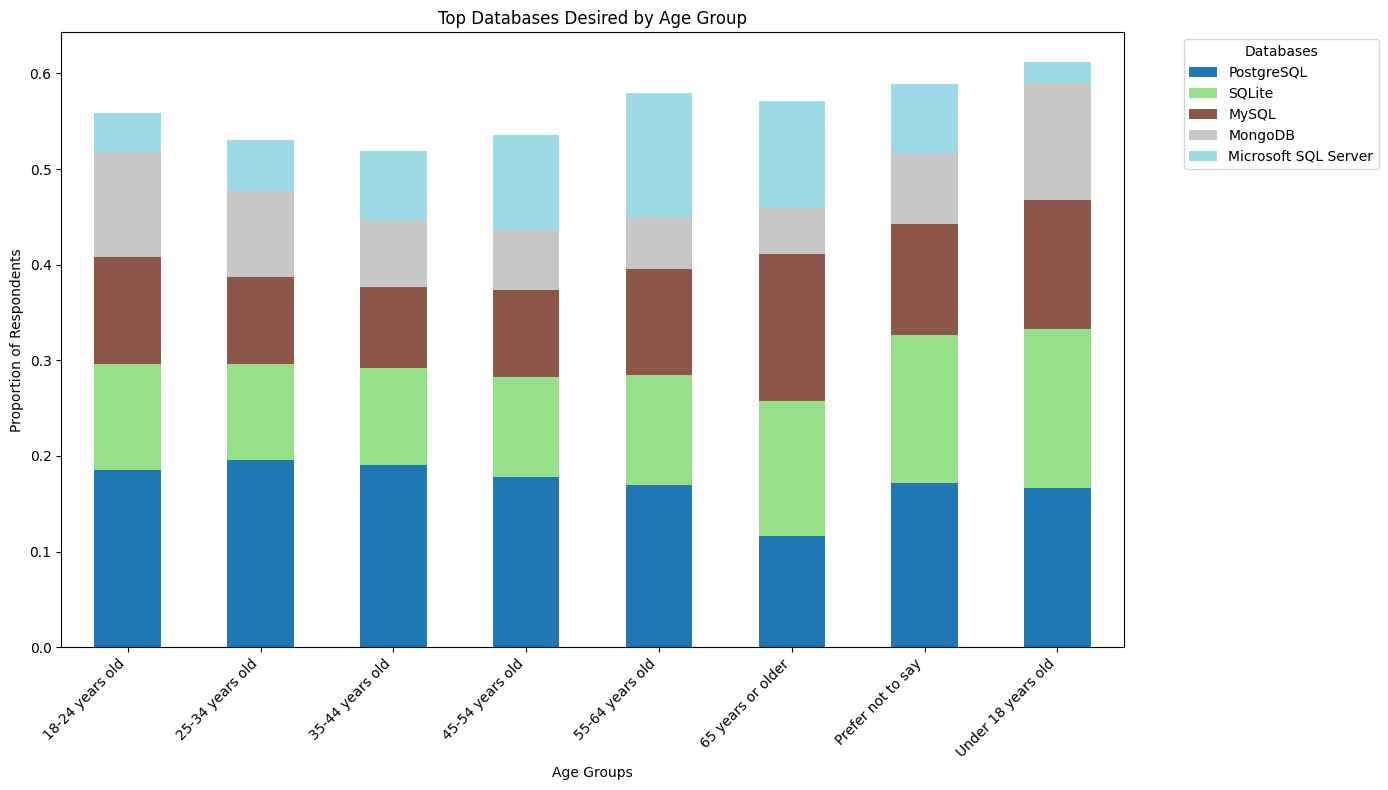

In [31]:
##Write your code here
# Query the data
query = """
SELECT Age, DatabaseWantToWorkWith
FROM main
WHERE Age IS NOT NULL AND DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Split 'DatabaseWantToWorkWith' into individual databases
df_expanded = df.assign(DatabaseWantToWorkWith=df['DatabaseWantToWorkWith'].str.split(';')).explode('DatabaseWantToWorkWith')

# Group by Age and Database, then calculate the frequency of each database in each age group
database_distribution = df_expanded.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Normalize the database counts within each age group (to get proportions)
database_distribution_normalized = database_distribution.div(database_distribution.sum(axis=1), axis=0)

# Select the top N databases across all age groups to plot (e.g., top 5 most desired databases)
top_databases = database_distribution_normalized.sum(axis=0).nlargest(5).index
database_distribution_top = database_distribution_normalized[top_databases]

# Create the stacked bar chart
plt.figure(figsize=(12, 8))

# Plot the stacked bar chart
database_distribution_top.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Customize the plot
plt.title('Top Databases Desired by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Databases', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


<Figure size 2000x1200 with 0 Axes>

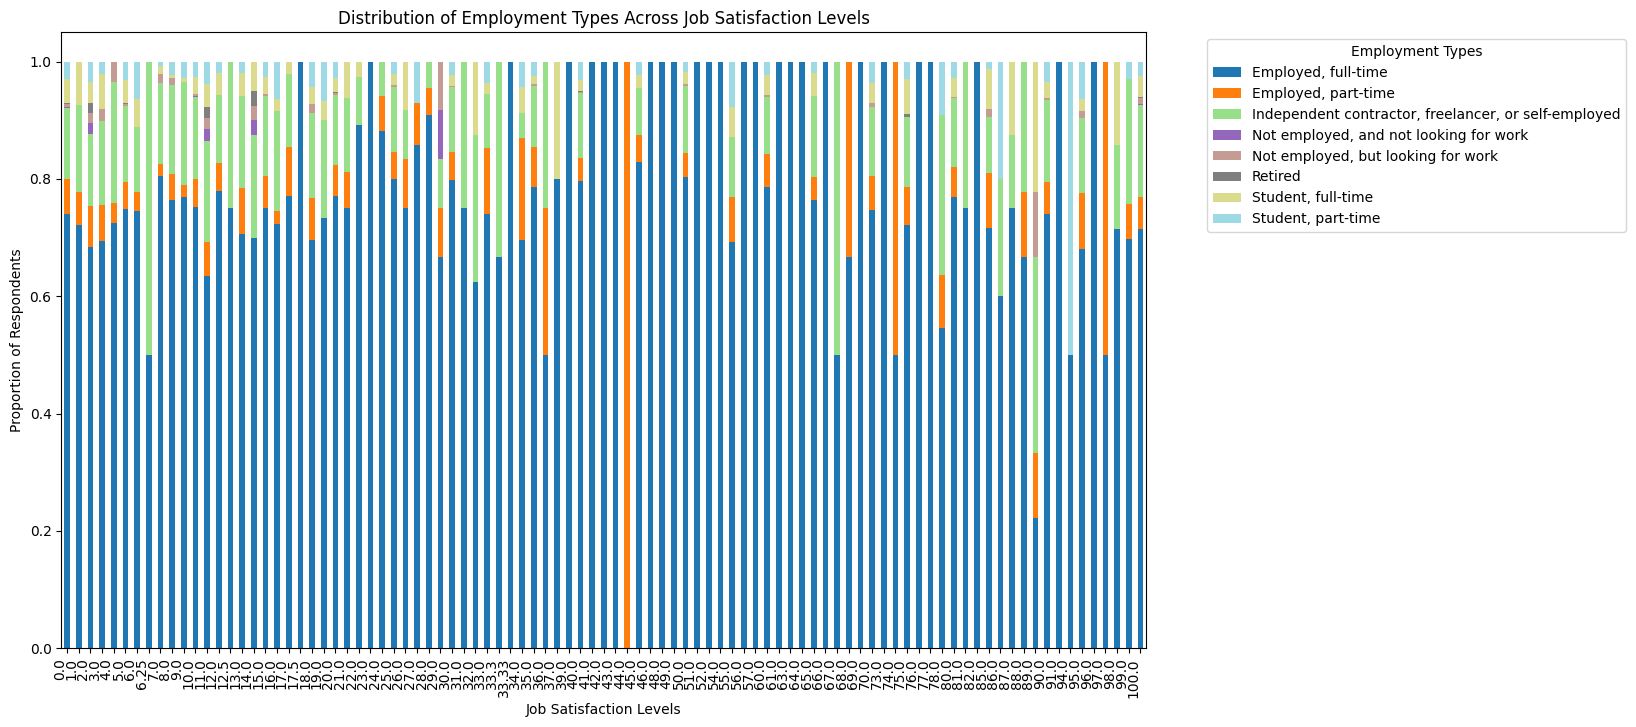

In [37]:
##Write your code here

# Query the data
query = """
SELECT JobSatPoints_6, Employment
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND Employment IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Split the 'Employment' column into individual employment types
df_expanded = df.assign(Employment=df['Employment'].str.split(';')).explode('Employment')

# Group by JobSatPoints_6 and Employment, then calculate the frequency of each employment type in each satisfaction level
employment_distribution = df_expanded.groupby(['JobSatPoints_6', 'Employment']).size().unstack(fill_value=0)

# Normalize the employment counts within each job satisfaction level (to get proportions)
employment_distribution_normalized = employment_distribution.div(employment_distribution.sum(axis=1), axis=0)

# Create the stacked bar chart
plt.figure(figsize=(20, 12))

# Plot the stacked bar chart
employment_distribution_normalized.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Customize the plot
plt.title('Distribution of Employment Types Across Job Satisfaction Levels')
plt.xlabel('Job Satisfaction Levels')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Employment Types', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot

plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


<Figure size 1400x800 with 0 Axes>

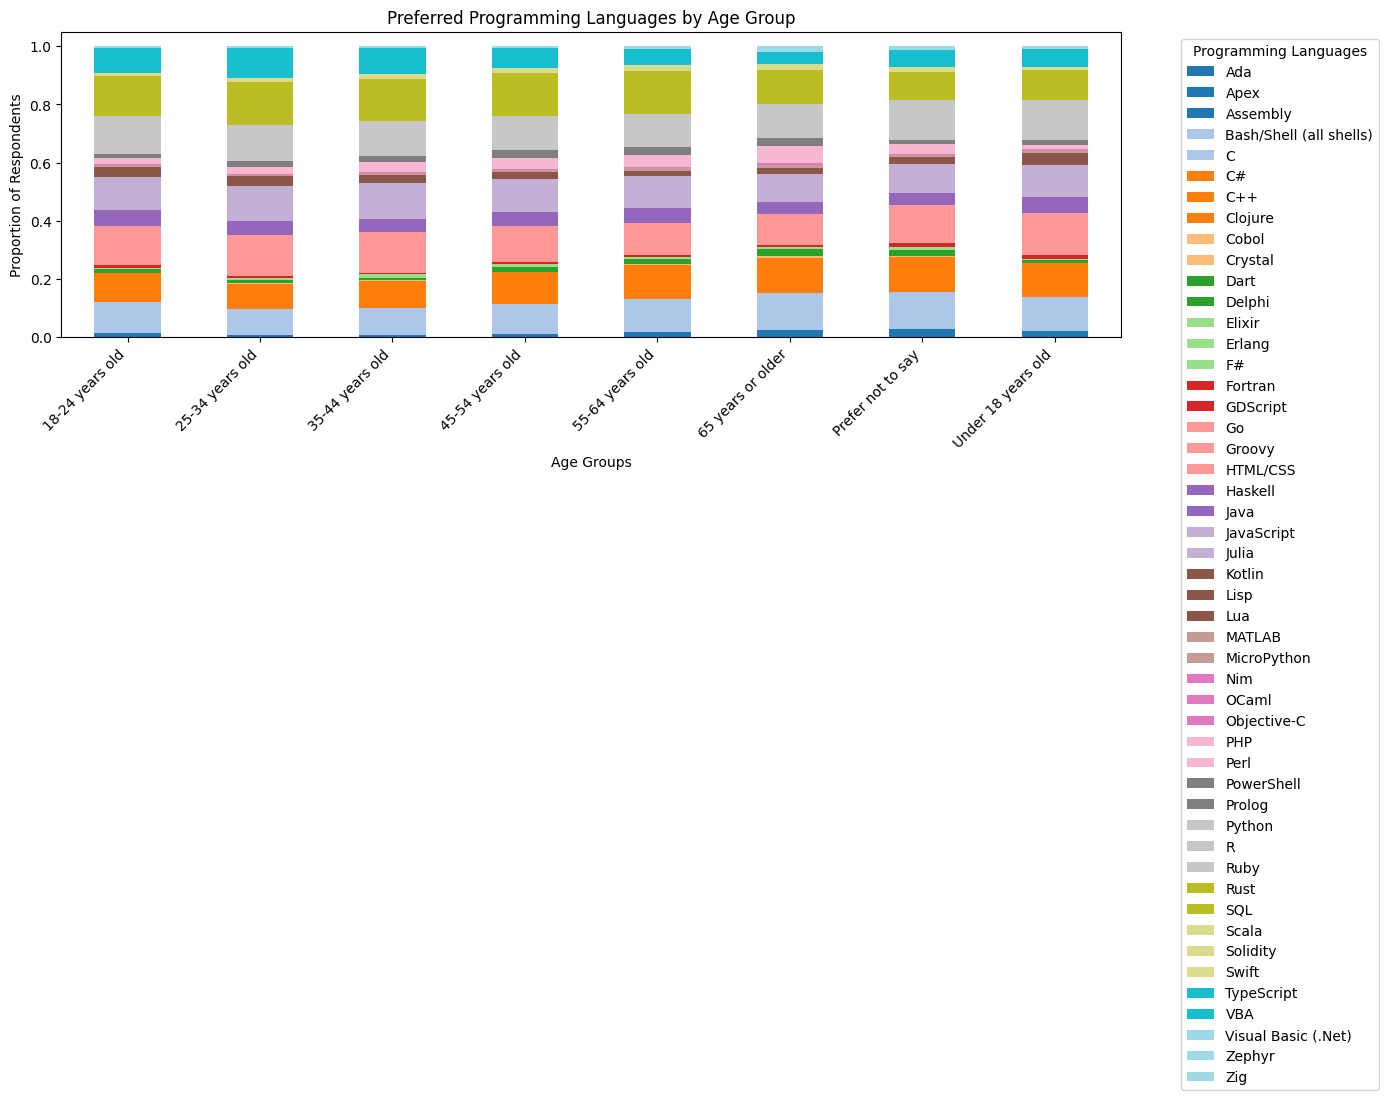

In [38]:
##Write your code here

# Query the data
query = """
SELECT Age, LanguageAdmired
FROM main
WHERE Age IS NOT NULL AND LanguageAdmired IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Split the 'LanguageAdmired' column into individual languages
df_expanded = df.assign(LanguageAdmired=df['LanguageAdmired'].str.split(';')).explode('LanguageAdmired')

# Group by Age and LanguageAdmired, then calculate the frequency of each language in each age group
language_distribution = df_expanded.groupby(['Age', 'LanguageAdmired']).size().unstack(fill_value=0)

# Normalize the language counts within each age group (to get proportions)
language_distribution_normalized = language_distribution.div(language_distribution.sum(axis=1), axis=0)

# Create the stacked bar chart
plt.figure(figsize=(14, 8))

# Plot the stacked bar chart
language_distribution_normalized.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Customize the plot
plt.title('Preferred Programming Languages by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Programming Languages', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


<Figure size 1400x800 with 0 Axes>

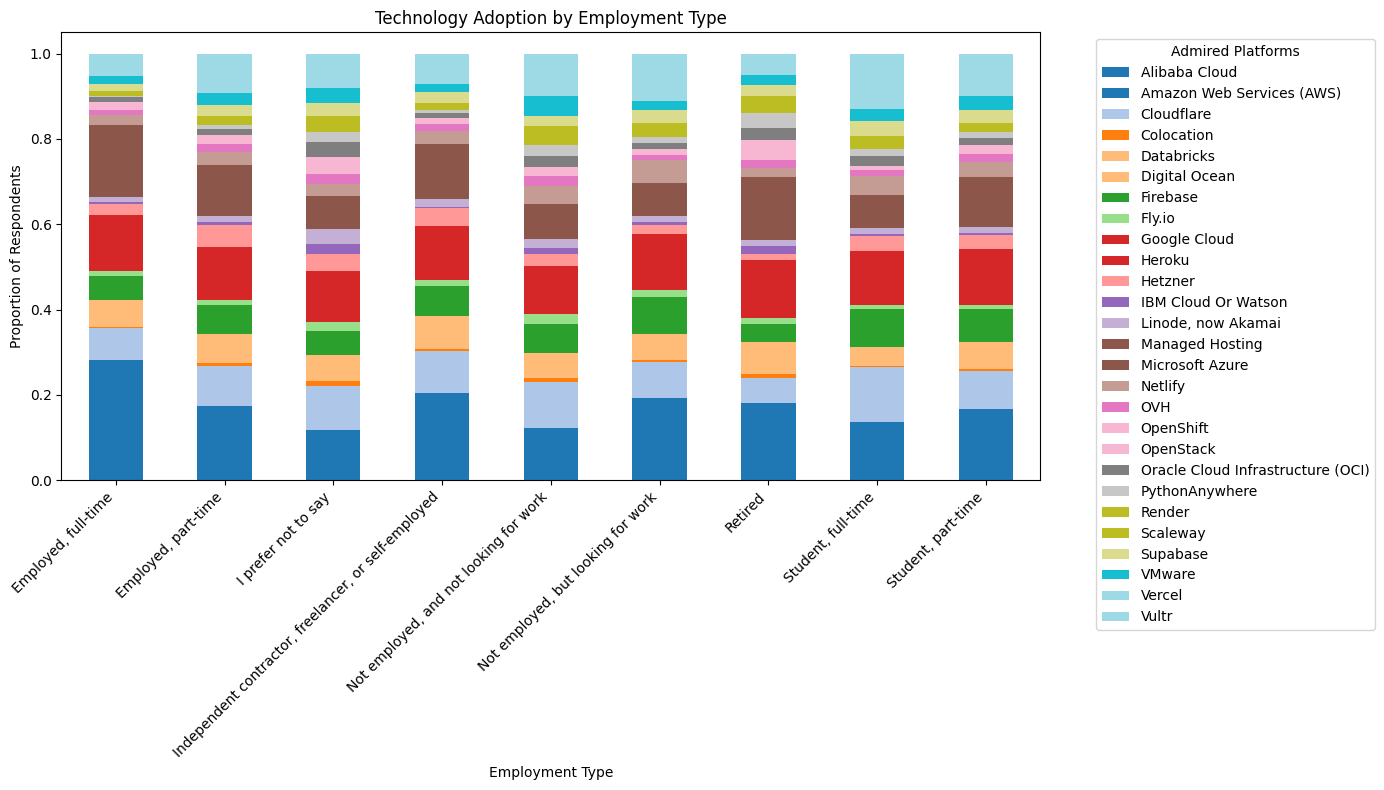

In [51]:
##Write your code here

# Query the data
query = """
SELECT Employment, PlatformAdmired
FROM main
WHERE Employment IS NOT NULL AND PlatformAdmired IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Split the 'EmploymentType' column by ';' and explode to have one row per value
df_expanded = df.assign(Employment=df['Employment'].str.split(';')).explode('Employment')

# Split the 'PlatformAdmired' column by ';' and explode to have one row per value
df_expanded = df_expanded.assign(PlatformAdmired=df_expanded['PlatformAdmired'].str.split(';')).explode('PlatformAdmired')

# Group by EmploymentType and PlatformAdmired, then calculate the frequency of each platform in each employment type
platform_distribution = df_expanded.groupby(['Employment', 'PlatformAdmired']).size().unstack(fill_value=0)

# Normalize the platform counts within each employment type (to get proportions)
platform_distribution_normalized = platform_distribution.div(platform_distribution.sum(axis=1), axis=0)

# Create the stacked bar chart
plt.figure(figsize=(14, 8))

# Plot the stacked bar chart
platform_distribution_normalized.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Customize the plot
plt.title('Technology Adoption by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Admired Platforms', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [52]:
conn.close()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
